# Import du dataset

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import itertools

In [106]:
url = f"https://docs.google.com/spreadsheets/d/1PIMO76csrwWa7eRCZHQziJQvqGMy7M_EpZLblZjRFMU/gviz/tq?tqx=out:csv&sheet=dataset_clean"
df = pd.read_csv(url)
df

,age,attrition,deplacements_pro,service,trajet_quotidien_en_miles,num_niveau_detude,domaine_detude,identifiant_employe,num_satisfaction_environnement,genre,...,pourcentage_augmentation,niveau_carriere,temps_de_formation,anciennete,anciennete_poste,derniere_promotion,annees_avec_manager,prenom,nom,email
0,41,Oui,Rare,Ventes,1,2,Sciences,1,2,Femme,...,11 - 12,06 - 10,0,06 - 10,03 - 05,0 - 02,03 - 05,Rose,Atkins,r.atkins@ibm-data.com
1,49,Non,Fréquent,R&D,8,1,Sciences,2,3,Homme,...,21 +,06 - 10,01 - 03,06 - 10,06 - 10,0 - 02,06 - 10,Timothy,Davis,t.davis@ibm-data.com
2,37,Oui,Rare,R&D,2,2,Autre,4,4,Homme,...,15 - 20,06 - 10,01 - 03,0 - 02,0 - 02,0 - 02,0 - 02,Harold,Newman,h.newman@ibm-data.com
3,33,Non,Fréquent,R&D,3,4,Sciences,5,4,Femme,...,11 - 12,06 - 10,01 - 03,06 - 10,06 - 10,03 - 05,0 - 02,Michelle,Olson,m.olson@ibm-data.com
4,27,Non,Rare,R&D,2,1,Médecine,7,1,Homme,...,11 - 12,06 - 10,01 - 03,0 - 02,0 - 02,0 - 02,0 - 02,Richard,Riley,r.riley@ibm-data.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Non,Fréquent,R&D,23,2,Médecine,2061,3,Homme,...,15 - 20,10 - 20,01 - 03,03 - 05,0 - 02,0 - 02,03 - 05,Ricky,Johnson,r.johnson1@ibm-data.com
1466,39,Non,Rare,R&D,6,1,Médecine,2062,4,Homme,...,15 - 20,06 - 10,04 +,06 - 10,06 - 10,0 - 02,06 - 10,Carlos,Holmes,c.holmes@ibm-data.com
1467,27,Non,Rare,R&D,4,3,Sciences,2064,2,Homme,...,15 - 20,06 - 10,0,06 - 10,0 - 02,0 - 02,03 - 05,Alejandro,Mclaughlin,a.mclaughlin@ibm-data.com
1468,49,Non,Fréquent,Ventes,2,3,Médecine,2065,4,Homme,...,13 - 14,10 - 20,01 - 03,06 - 10,06 - 10,0 - 02,06 - 10,Roger,Green,r.green@ibm-data.com


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             1470 non-null   int64 
 1   attrition                       1470 non-null   object
 2   deplacements_pro                1470 non-null   object
 3   service                         1470 non-null   object
 4   trajet_quotidien_en_miles       1470 non-null   int64 
 5   num_niveau_detude               1470 non-null   int64 
 6   domaine_detude                  1470 non-null   object
 7   identifiant_employe             1470 non-null   int64 
 8   num_satisfaction_environnement  1470 non-null   int64 
 9   genre                           1470 non-null   object
 10  num_implication                 1470 non-null   int64 
 11  num_niveau_hierarchique         1470 non-null   int64 
 12  poste                           1470 non-null   

# Heatmap sur l'ensemble des données
Identification de corrélation avec l'attrition première approche

In [24]:
df1=df[["attrition","trajet_quotidien_en_miles","heures_sup","deplacements_pro","annees_dans_entreprise","num_satisfaction_relation","age","salaire_mensuel","genre"]]
df1

,attrition,trajet_quotidien_en_miles,heures_sup,deplacements_pro,annees_dans_entreprise,num_satisfaction_relation,age,salaire_mensuel,genre
0,Oui,1,Oui,Rare,6,1,41,5993,Femme
1,Non,8,Non,Fréquent,10,4,49,5130,Homme
2,Oui,2,Oui,Rare,0,2,37,2090,Homme
3,Non,3,Oui,Fréquent,8,3,33,2909,Femme
4,Non,2,Non,Rare,2,4,27,3468,Homme
...,...,...,...,...,...,...,...,...,...
1465,Non,23,Non,Fréquent,5,3,36,2571,Homme
1466,Non,6,Non,Rare,7,1,39,9991,Homme
1467,Non,4,Oui,Rare,6,2,27,6142,Homme
1468,Non,2,Non,Fréquent,9,4,49,5390,Homme


In [25]:
#Transformation des la colonne déplacement pro en chiffre 0 : aucun voyage, 1 : voyage rare et 2 : voyage fréquent
df1["deplacements_pro"]=df1["deplacements_pro"].replace("Aucun",0).replace("Rare",1).replace("Fréquent",2)

#Transformation de la colonne genre en 1 pour les hommes et 0 pour les femmes
df1["genre"]=df1["genre"].replace("Homme",1).replace("Femme",0)

#Autres solutions pour rédiger le code avec fonction .loc()
# df1.loc[df["genre"]=="Femme","genre"]=0
# df1.loc[df["genre"]=="Homme","genre"]=1

#Transformation de l'attrition en chiffre
df1["attrition"]=df1["attrition"].replace("Oui",1).replace("Non",0)

#Transformation des heures supp en chiffre
df1["heures_sup"]=df1["heures_sup"].replace("Oui",1).replace("Non",0)
df1

/tmp/ipython-input-3923495905.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3923495905.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3923495905.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3923495905.py:5: SettingWit

,attrition,trajet_quotidien_en_miles,heures_sup,deplacements_pro,annees_dans_entreprise,num_satisfaction_relation,age,salaire_mensuel,genre
0,1,1,1,1,6,1,41,5993,0
1,0,8,0,2,10,4,49,5130,1
2,1,2,1,1,0,2,37,2090,1
3,0,3,1,2,8,3,33,2909,0
4,0,2,0,1,2,4,27,3468,1
...,...,...,...,...,...,...,...,...,...
1465,0,23,0,2,5,3,36,2571,1
1466,0,6,0,1,7,1,39,9991,1
1467,0,4,1,1,6,2,27,6142,1
1468,0,2,0,2,9,4,49,5390,1


In [26]:
corr=df1.corr()

<Axes: >

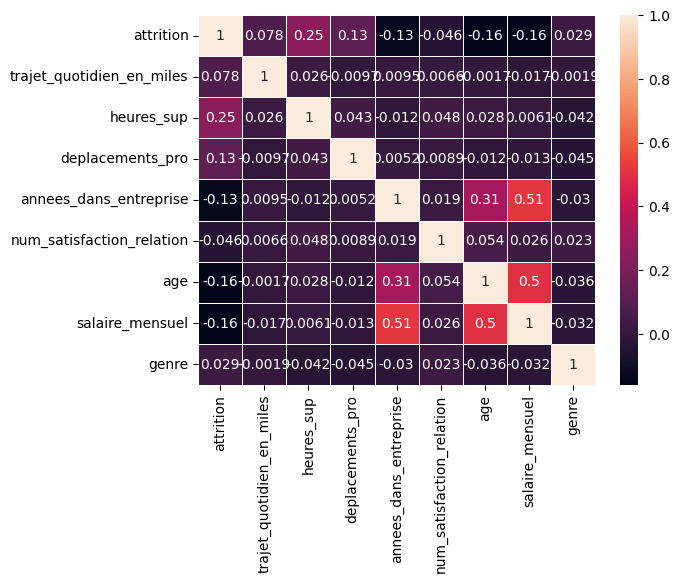

In [27]:
sns.heatmap(corr,annot=True,linewidths=0.5)

# Conclusions sur la premiere heatmap

Dans cette première approche, on peut voir les heures supplémentaires comme fortement corrélées à l'attrition. Les trajets quotidiens ressortent aussi beaucoup.
=> Analyse complémentaires pour creuser avec nos résultats précédents.

# Analyses complémentaires

## Age et attrition
Focus sur les jeunes 18- 24

In [28]:
df_jeune_18_24=df[df["categorie_age"]=="24 et moins"]
df_jeune_18_24=df_jeune_18_24[["attrition","trajet_quotidien_en_miles","heures_sup","deplacements_pro","annees_dans_entreprise","num_satisfaction_relation","age","salaire_mensuel","genre"]]
df_jeune_18_24

,attrition,trajet_quotidien_en_miles,heures_sup,deplacements_pro,annees_dans_entreprise,num_satisfaction_relation,age,salaire_mensuel,genre
17,Non,16,Oui,Aucun,1,2,22,2935,Homme
20,Non,11,Non,Aucun,4,4,24,4011,Femme
23,Non,15,Non,Rare,0,4,21,1232,Homme
34,Oui,1,Oui,Rare,2,1,24,2293,Homme
86,Non,2,Non,Rare,0,3,23,2322,Homme
...,...,...,...,...,...,...,...,...,...
1407,Non,1,Non,Rare,4,2,24,4617,Homme
1408,Non,12,Non,Rare,5,3,23,2647,Homme
1423,Non,1,Non,Rare,3,4,22,3375,Homme
1436,Non,5,Oui,Rare,2,4,21,2380,Homme


In [29]:
#Transformation des la colonne déplacement pro en chiffre 0 : aucun voyage, 1 : voyage rare et 2 : voyage fréquent
df_jeune_18_24["deplacements_pro"]=df_jeune_18_24["deplacements_pro"].replace("Aucun",0).replace("Rare",1).replace("Fréquent",2)

#Transformation de la colonne genre
df_jeune_18_24.loc[df["genre"]=="Femme","genre"]=0
df_jeune_18_24.loc[df["genre"]=="Homme","genre"]=1

#Transformation de l'attrition en chiffre
df_jeune_18_24["attrition"]=df_jeune_18_24["attrition"].replace("Oui",1).replace("Non",0)

#Transformation des heures supp en chiffre
df_jeune_18_24["heures_sup"]=df_jeune_18_24["heures_sup"].replace("Oui",1).replace("Non",0)
df_jeune_18_24

/tmp/ipython-input-3965098559.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3965098559.py:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3965098559.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,attrition,trajet_quotidien_en_miles,heures_sup,deplacements_pro,annees_dans_entreprise,num_satisfaction_relation,age,salaire_mensuel,genre
17,0,16,1,0,1,2,22,2935,1
20,0,11,0,0,4,4,24,4011,0
23,0,15,0,1,0,4,21,1232,1
34,1,1,1,1,2,1,24,2293,1
86,0,2,0,1,0,3,23,2322,1
...,...,...,...,...,...,...,...,...,...
1407,0,1,0,1,4,2,24,4617,1
1408,0,12,0,1,5,3,23,2647,1
1423,0,1,0,1,3,4,22,3375,1
1436,0,5,1,1,2,4,21,2380,1


<Axes: >

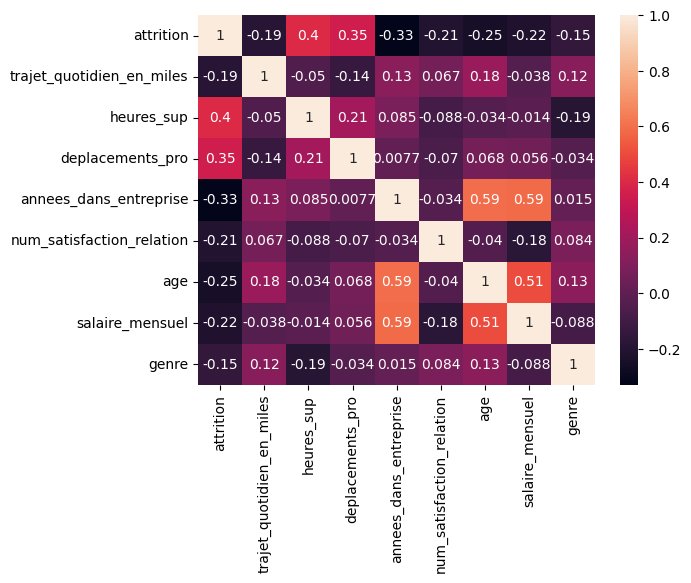

In [30]:
corr_jeune_18_24=df_jeune_18_24.corr()
sns.heatmap(corr_jeune_18_24,annot=True)

Focus sur les 25-34 ans

In [31]:
#Création du dataframe
df_jeune_25_34=df[df["categorie_age"]=="25 - 34"]

#Choix de certaines colonnes numériques pour l'analyse de corrélation
df_jeune_25_34=df_jeune_25_34[["attrition","trajet_quotidien_en_miles","heures_sup","deplacements_pro","annees_dans_entreprise","num_satisfaction_relation","age","salaire_mensuel","genre"]]

#Transformation des la colonne déplacement pro en chiffre 0 : aucun voyage, 1 : voyage rare et 2 : voyage fréquent
df_jeune_25_34["deplacements_pro"]=df_jeune_25_34["deplacements_pro"].replace("Aucun",0).replace("Rare",1).replace("Fréquent",2)

#Transformation de la colonne genre
df_jeune_25_34.loc[df["genre"]=="Femme","genre"]=0
df_jeune_25_34.loc[df["genre"]=="Homme","genre"]=1

#Transformation de l'attrition en chiffre
df_jeune_25_34["attrition"]=df_jeune_25_34["attrition"].replace("Oui",1).replace("Non",0)

#Transformation des heures supp en chiffre
df_jeune_25_34["heures_sup"]=df_jeune_25_34["heures_sup"].replace("Oui",1).replace("Non",0)
df_jeune_25_34

/tmp/ipython-input-2618428286.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-2618428286.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-2618428286.py:18: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,attrition,trajet_quotidien_en_miles,heures_sup,deplacements_pro,annees_dans_entreprise,num_satisfaction_relation,age,salaire_mensuel,genre
3,0,3,1,2,8,3,33,2909,0
4,0,2,0,1,2,4,27,3468,1
5,0,2,0,2,7,3,32,3068,1
7,0,24,0,1,1,2,30,2693,1
11,0,15,1,1,9,4,29,4193,0
...,...,...,...,...,...,...,...,...,...
1460,0,28,0,1,5,2,29,3785,0
1463,0,5,0,0,9,2,31,9936,1
1464,0,5,0,1,4,4,26,2966,0
1467,0,4,1,1,6,2,27,6142,1


<Axes: >

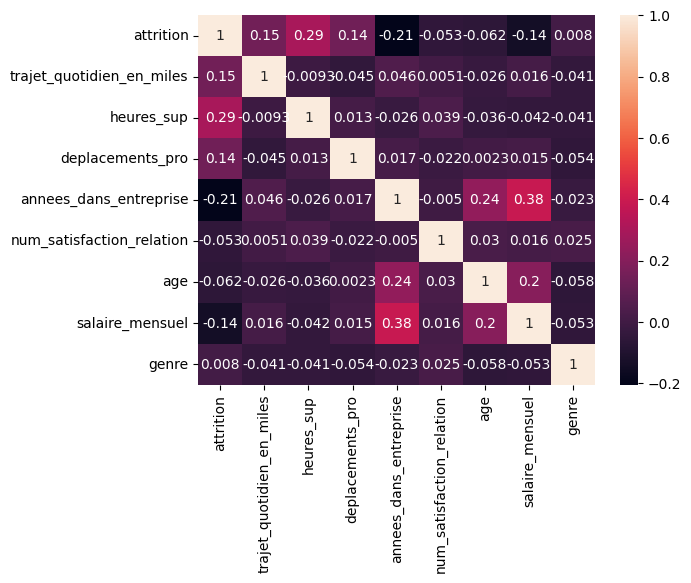

In [32]:
corr_jeune_25_34=df_jeune_25_34.corr()
sns.heatmap(corr_jeune_25_34,annot=True)

Croisement age, ancienneté et attrition

In [33]:
# Agrégation par tranche d'âge et ancienneté
df_agg = df.groupby(["age", "annees_dans_entreprise", "attrition"]).size().reset_index(name="Count")

# Calcul du taux de départ par groupe
df_rate = df_agg.pivot_table(
    index=["age", "annees_dans_entreprise"],
    columns="attrition",
    values="Count",
    fill_value=0
).reset_index()
df_rate["attrition_rate"] = df_rate.get("Oui", 0) / (df_rate.get("Oui", 0) + df_rate.get("Non", 0))

# Scatter plot
fig = px.scatter(
    df_rate,
    x="age",
    y="annees_dans_entreprise",
    color="attrition_rate",
    size="Oui",          # facultatif, pour montrer le nombre de départs
    color_continuous_scale=["white", "#1d70c2"],
    hover_data=["attrition_rate"]
)

fig.update_layout(title="Taux de départ selon âge et ancienneté")
fig.show()

## Analyses avec le salaire

Comparaison salaire, ancienneté et attrition

In [34]:
df_reste=df[df["attrition"]=="Non"]
df_depart=df[df["attrition"]=="Oui"]

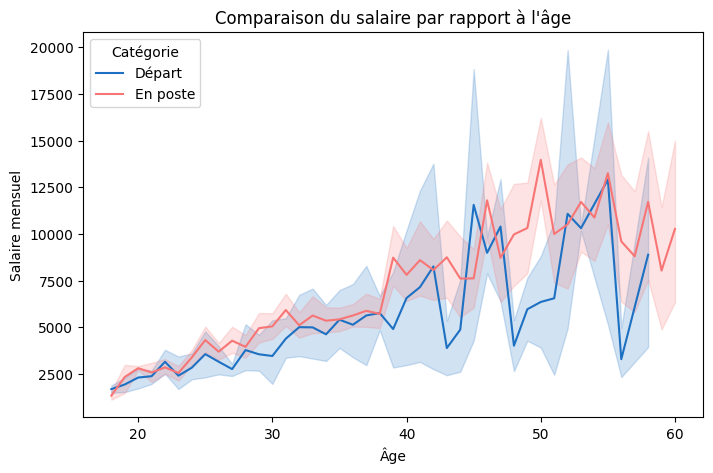

In [35]:
plt.figure(figsize=(8,5))

sns.lineplot(x=df_depart["age"], y=df_depart["salaire_mensuel"], color="#1d70c2", label="Départ")
sns.lineplot(x=df_reste["age"], y=df_reste["salaire_mensuel"], color="#f87575", label="En poste")

plt.title("Comparaison du salaire par rapport à l'âge")
plt.xlabel("Âge")
plt.ylabel("Salaire mensuel")
plt.legend(title="Catégorie")

plt.show()

## Analyse des heures supplémentaires
Objectif => comprendre qui fait des heures sup

In [47]:
df.loc[df["heures_sup"] == "Non","heures_sup2"] = 0
df.loc[df["heures_sup"] == "Oui","heures_sup2"] = 1
df

,age,attrition,deplacements_pro,service,trajet_quotidien_en_miles,num_niveau_detude,domaine_detude,identifiant_employe,num_satisfaction_environnement,genre,...,niveau_carriere,temps_de_formation,anciennete,anciennete_poste,derniere_promotion,annees_avec_manager,prenom,nom,email,heures_sup2
0,41,Oui,Rare,Ventes,1,2,Sciences,1,2,Femme,...,06 - 10,0,06 - 10,03 - 05,0 - 02,03 - 05,Rose,Atkins,r.atkins@ibm-data.com,1
1,49,Non,Fréquent,R&D,8,1,Sciences,2,3,Homme,...,06 - 10,01 - 03,06 - 10,06 - 10,0 - 02,06 - 10,Timothy,Davis,t.davis@ibm-data.com,0
2,37,Oui,Rare,R&D,2,2,Autre,4,4,Homme,...,06 - 10,01 - 03,0 - 02,0 - 02,0 - 02,0 - 02,Harold,Newman,h.newman@ibm-data.com,1
3,33,Non,Fréquent,R&D,3,4,Sciences,5,4,Femme,...,06 - 10,01 - 03,06 - 10,06 - 10,03 - 05,0 - 02,Michelle,Olson,m.olson@ibm-data.com,1
4,27,Non,Rare,R&D,2,1,Médecine,7,1,Homme,...,06 - 10,01 - 03,0 - 02,0 - 02,0 - 02,0 - 02,Richard,Riley,r.riley@ibm-data.com,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Non,Fréquent,R&D,23,2,Médecine,2061,3,Homme,...,10 - 20,01 - 03,03 - 05,0 - 02,0 - 02,03 - 05,Ricky,Johnson,r.johnson1@ibm-data.com,0
1466,39,Non,Rare,R&D,6,1,Médecine,2062,4,Homme,...,06 - 10,04 +,06 - 10,06 - 10,0 - 02,06 - 10,Carlos,Holmes,c.holmes@ibm-data.com,0
1467,27,Non,Rare,R&D,4,3,Sciences,2064,2,Homme,...,06 - 10,0,06 - 10,0 - 02,0 - 02,03 - 05,Alejandro,Mclaughlin,a.mclaughlin@ibm-data.com,1
1468,49,Non,Fréquent,Ventes,2,3,Médecine,2065,4,Homme,...,10 - 20,01 - 03,06 - 10,06 - 10,0 - 02,06 - 10,Roger,Green,r.green@ibm-data.com,0


In [59]:
# Aggrégation
df_dp = (df.groupby(["service", "heures_sup2"], as_index=False).agg(Age_sum=("service", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("service")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par services"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["service"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

In [60]:
# Aggrégation
df_dp = (df.groupby(["niveau_hierarchique", "heures_sup2"], as_index=False).agg(Age_sum=("niveau_hierarchique", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("niveau_hierarchique")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par niveau hierarchique"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["niveau_hierarchique"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

In [61]:
# Aggrégation
df_dp = (df.groupby(["statut", "heures_sup2"], as_index=False).agg(Age_sum=("statut", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("statut")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par statut"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["statut"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

In [62]:
# Aggrégation
df_dp = (df.groupby(["equilibre_pro_perso", "heures_sup2"], as_index=False).agg(Age_sum=("equilibre_pro_perso", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("equilibre_pro_perso")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par equilibre pro/perso"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["equilibre_pro_perso"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

In [63]:
# Aggrégation
df_dp = (df.groupby(["satisfaction_travail", "heures_sup2"], as_index=False).agg(Age_sum=("satisfaction_travail", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("satisfaction_travail")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par niveau de satisfaction au travail"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["satisfaction_travail"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

In [64]:
# Aggrégation
df_dp = (df.groupby(["satisfaction_relation", "heures_sup2"], as_index=False).agg(Age_sum=("satisfaction_relation", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("satisfaction_relation")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par niveau de satisfaction des relations"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["satisfaction_relation"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

In [65]:
# Aggrégation
df_dp = (df.groupby(["satisfaction_environnement", "heures_sup2"], as_index=False).agg(Age_sum=("satisfaction_environnement", "count"),count=("heures_sup2", "count")))
df_dp["proportion"] = (df_dp["count"] / df_dp.groupby("satisfaction_environnement")["count"].transform("sum")).round(2)

# Config
colormap = {s: c for s, c in zip(df["heures_sup2"].unique(),["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"])}
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]], subplot_titles=("Proportion d'employés faisant des heures supplémentaires", "Heures supplémentaires par niveau de satisfaction de l'environnement"))

# Pie chart
pie_data = df["heures_sup2"].value_counts()
fig.add_trace(go.Pie(labels=pie_data.index, values=pie_data.values, marker=dict(colors=[colormap[s] for s in pie_data.index]), showlegend=False),row=1, col=1)

# Bar chart
for dp in df_dp["heures_sup2"].unique():
    df_filtered = df_dp[df_dp["heures_sup2"] == dp]
    fig.add_trace(go.Bar(x=df_filtered["satisfaction_environnement"], y=df_filtered["proportion"], name=dp, text=df_filtered["proportion"], textposition="auto", marker_color=colormap[dp]), row=1, col=2)

fig.update_layout(height=500, width=1000, barmode="stack", showlegend=True)
fig.show()

## Analyse des profils hommes et femmes
Vérification de différences hommes / femmes

In [66]:
df_homme=df[df["genre"]=="Homme"]
df_femme=df[df["genre"]=="Femme"]

In [67]:
# Aggrégations
count = (df_homme["implication"].value_counts().sort_values(ascending=False).index.tolist())
count2 = (df_femme["implication"].value_counts().sort_values(ascending=False).index.tolist())

# Config
fig = make_subplots(rows=1, cols=2, subplot_titles=("Femmes", "Hommes"), specs=[[{"type": "domain"}, {"type": "domain"}]])
colormap = ["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]

# Pie Chart Femmes
pie = px.pie(df_femme, names="implication", category_orders={"implication": count2}, color="implication", color_discrete_sequence=colormap, hole=0.4)
pie.update_traces(textinfo="percent+label")
for trace in pie.data:
    fig.add_trace(trace, row=1, col=1)

# Pie chart Hommes
pie = px.pie(df_homme, names="implication", category_orders={"implication": count}, color="implication", color_discrete_sequence=colormap, hole=0.4)
pie.update_traces(textinfo="percent+label")
for trace in pie.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(height=500, showlegend=True, title="Hommes vs Femmes - Implication")
fig.show()

In [73]:
# Aggrégations
count = (df_homme["niveau_hierarchique"].value_counts().sort_values(ascending=False).index.tolist())
count2 = (df_femme["niveau_hierarchique"].value_counts().sort_values(ascending=False).index.tolist())

# Config
fig = make_subplots(rows=1, cols=2, subplot_titles=("Femmes", "Hommes"), specs=[[{"type": "domain"}, {"type": "domain"}]])
all_categories = list(set(df_homme["niveau_hierarchique"]) | set(df_femme["niveau_hierarchique"]))
colormap = ["#f87575", "#1d70c2", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]
colormap_categ = {cat: colormap[i % len(colormap)] for i, cat in enumerate(sorted(all_categories))}

# Pie Chart Femmes
pie = px.pie(df_femme, names="niveau_hierarchique", category_orders={"niveau_hierarchique": count2}, color="niveau_hierarchique", color_discrete_map=colormap_categ, hole=0.4)
pie.update_traces(textinfo="percent+label")
for trace in pie.data:
    fig.add_trace(trace, row=1, col=1)

# Pie chart Hommes
pie = px.pie(df_homme, names="niveau_hierarchique", category_orders={"niveau_hierarchique": count}, color="niveau_hierarchique", color_discrete_map=colormap_categ, hole=0.4)
pie.update_traces(textinfo="percent+label")
for trace in pie.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(height=500, showlegend=True, title="Hommes vs Femmes - Niveau hiérarchique")
fig.show()

In [75]:
# Aggrégations
count = (df_homme["attrition"].value_counts().sort_values(ascending=False).index.tolist())
count2 = (df_femme["attrition"].value_counts().sort_values(ascending=False).index.tolist())

# Config
fig = make_subplots(rows=1, cols=2, subplot_titles=("Femmes", "Hommes"), specs=[[{"type": "domain"}, {"type": "domain"}]])
all_categories = list(set(df_homme["attrition"]) | set(df_femme["attrition"]))
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]
colormap_categ = {cat: colormap[i % len(colormap)] for i, cat in enumerate(sorted(all_categories))}

# Pie Chart Femmes
pie = px.pie(df_femme, names="attrition", category_orders={"attrition": count2}, color="attrition", color_discrete_map=colormap_categ, hole=0.4)
pie.update_traces(textinfo="percent+label")
for trace in pie.data:
    fig.add_trace(trace, row=1, col=1)

# Pie chart Hommes
pie = px.pie(df_homme, names="attrition", category_orders={"attrition": count}, color="attrition", color_discrete_map=colormap_categ, hole=0.4)
pie.update_traces(textinfo="percent+label")
for trace in pie.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(height=500, showlegend=True, title="Hommes vs Femmes - Attrition")
fig.show()

In [77]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]


# --- Ordre des catégories ---
cat_order = (df["categorie_salaire"].value_counts().sort_index().index.tolist())

# --- Histogramme groupé ---
fig = px.histogram(df, x="categorie_salaire", color="genre", barmode="group", category_orders={"categorie_salaire": cat_order}, color_discrete_map={"Femme": colormap[2], "Homme": colormap[0] }, histnorm="percent")

fig.update_layout(title="Comparaison Hommes vs Femmes — Catégorie de salaire", xaxis_title="Catégorie de salaire", yaxis_title="Effectifs")
fig.show()

In [78]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]

# --- Ordre des catégories ---
cat_order = (df["situation"].value_counts().sort_index().index.tolist())

# --- Histogramme groupé ---
fig = px.histogram(df, x="situation", color="genre", barmode="group", category_orders={"situation": cat_order}, color_discrete_map={"Femme": colormap[2], "Homme": colormap[0] }, histnorm="percent")

fig.update_layout(title="Comparaison Hommes vs Femmes — Situation", xaxis_title="Situation", yaxis_title="Effectifs")
fig.show()

In [79]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8", "#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]

# --- Ordre des catégories ---
cat_order = (df["taux_daction"].value_counts().sort_index().index.tolist())

# --- Histogramme groupé ---
fig = px.histogram(df, x="taux_daction", color="genre", barmode="group", category_orders={"taux_daction": cat_order}, color_discrete_map={"Femme": colormap[2], "Homme": colormap[0] }, histnorm="percent")

fig.update_layout(title="Comparaison Hommes vs Femmes — Taux d'action", xaxis_title="taux d'action", yaxis_title="Effectifs")
fig.show()

Pas de différences significatives pour le genre

## Analyses niveau hiérarchique, nombre d'entreprises & ancienneté

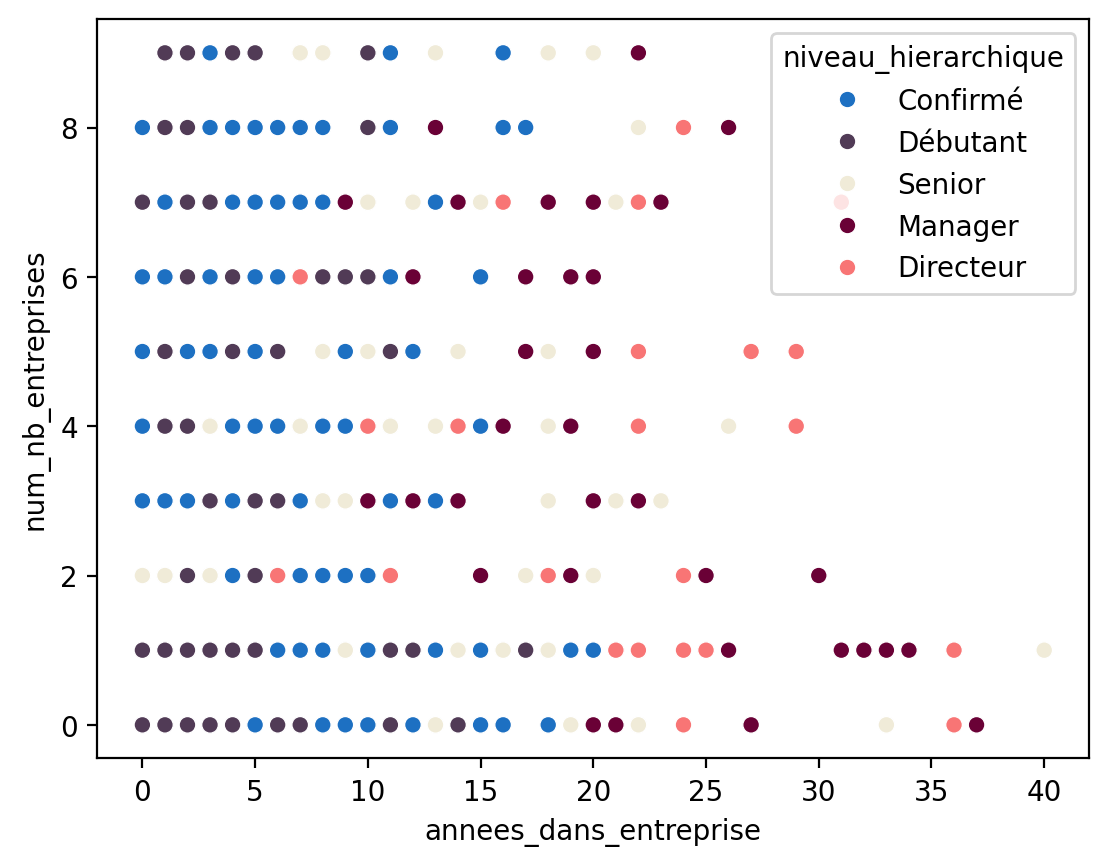

In [82]:
import matplotlib.pyplot as plt
categories = sorted(df["niveau_hierarchique"].unique())
palette = {cat: colormap[i % len(colormap)] for i, cat in enumerate(categories)}
plt.rcParams["figure.dpi"] = 200
sns.scatterplot(
    x="annees_dans_entreprise",
    y="num_nb_entreprises",
    data=df,
    hue="niveau_hierarchique",
    palette=palette)

plt.show()

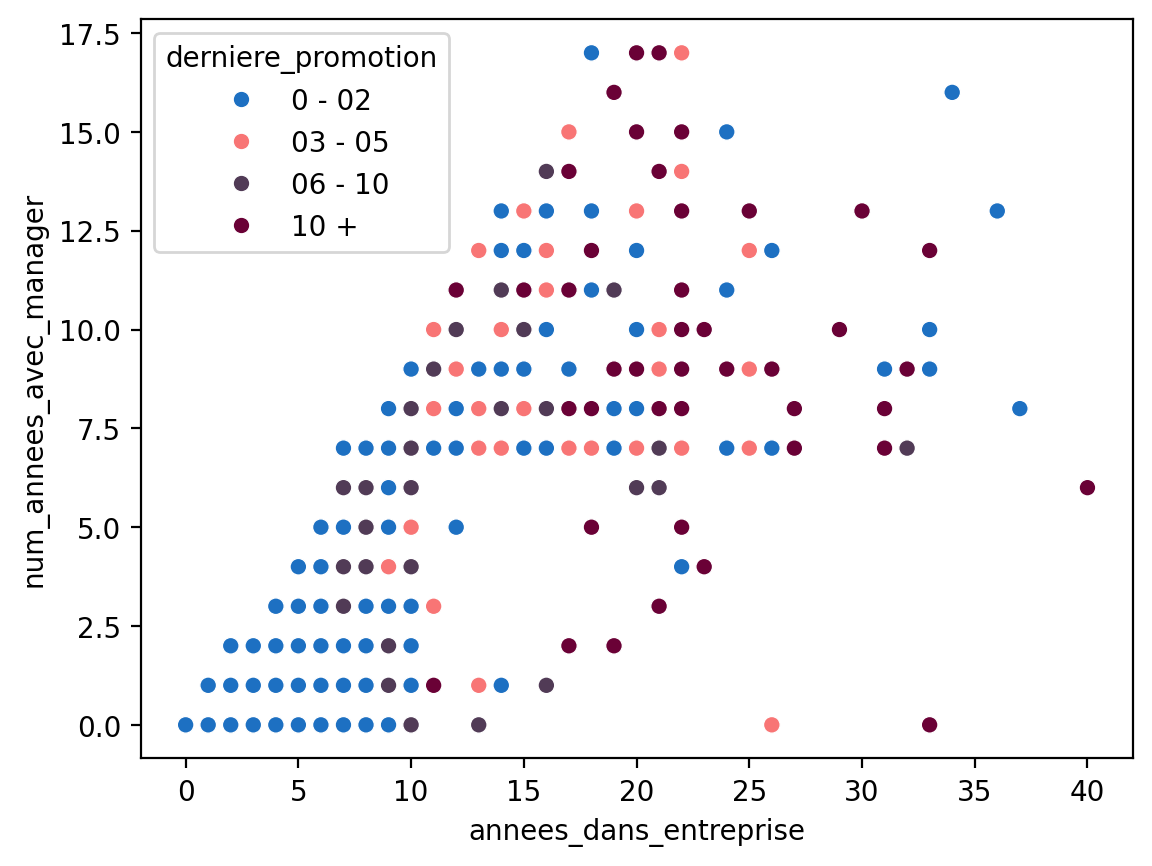

In [84]:
categories = sorted(df["derniere_promotion"].unique())
palette = {cat: colormap[i % len(colormap)] for i, cat in enumerate(categories)}
plt.rcParams["figure.dpi"] = 200
sns.scatterplot(
    x="annees_dans_entreprise",
    y="num_annees_avec_manager",
    data=df,
    hue="derniere_promotion",
    palette=palette)

plt.show()

## Analyse des différentes échelles de satisfaction
Objectif => comprendre si elles sont liées ou non

In [85]:
df_satisfaction=df[['num_satisfaction_environnement', 'satisfaction_environnement','num_satisfaction_travail','satisfaction_travail','num_satisfaction_relation', 'satisfaction_relation','num_attrition']]

In [86]:
df_relation_faible=df_satisfaction[df_satisfaction['num_satisfaction_relation']==1]
df_relation_faible.shape

(276, 7)

In [87]:
df_relation_faible["num_attrition"].value_counts(normalize=True).round(2)

#20% des gens qui votent 1 en satisfaction relationnelle partent

,proportion
num_attrition,
0,0.79
1,0.21


In [88]:
df_relation_faible["satisfaction_environnement"].value_counts(normalize=True).round(2)

,proportion
satisfaction_environnement,
Élevée,0.30
Très élevée,0.28
Faible,0.21
Moyenne,0.21


In [93]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8","#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]

fig = px.histogram(df_relation_faible, x="satisfaction_environnement", nbins=20, color_discrete_sequence=[colormap[0]])

fig.update_layout(title="Répartition de la note satisfaction environnementale pour une satisfaction relationnelle faible", xaxis_title="Satisfaction environnement", yaxis_title="Count")

fig.show()

In [94]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8","#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]

# Construire un mapping pour num_attrition → couleur
categories = sorted(df_relation_faible["num_attrition"].unique())
color_map = {cat: colormap[i % len(colormap)] for i, cat in enumerate(categories)}

fig = px.histogram(df_relation_faible, x="satisfaction_environnement", color="num_attrition", barmode="group", color_discrete_map=color_map)

fig.update_layout(title="Répartition de la note satisfaction environnementale pour une satisfaction relationnelle faible", xaxis_title="Satisfaction environnement", yaxis_title="Effectif")

fig.show()

In [95]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8","#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]
fig = px.histogram(df_relation_faible, x="satisfaction_travail", nbins=20, color_discrete_sequence=[colormap[0]])

fig.update_layout(title="Répartition de la note satisfaction au travail pour une satisfaction relationnelle faible", xaxis_title="Satisfaction travail", yaxis_title="Count")

fig.show()

In [96]:
colormap = ["#1d70c2", "#f87575", "#513b56", "#6a0136", "#f0ebd8","#3D315B", "#BADEFC", "#C49BBB", "#FFC6D9"]

# Construire un mapping pour num_attrition → couleur
categories = sorted(df_relation_faible["num_attrition"].unique())
color_map = {cat: colormap[i % len(colormap)] for i, cat in enumerate(categories)}

fig = px.histogram(df_relation_faible, x="satisfaction_travail", color="num_attrition", barmode="group", color_discrete_map=color_map)

fig.update_layout(title="Répartition de la note satisfaction travail pour une satisfaction relationnelle faible", xaxis_title="Satisfaction travail", yaxis_title="Effectif")

fig.show()

In [99]:
df_satisfaction_num=df_satisfaction.select_dtypes(include="number")
df_satisfaction_num

,num_satisfaction_environnement,num_satisfaction_travail,num_satisfaction_relation,num_attrition
0,2,4,1,1
1,3,2,4,0
2,4,3,2,1
3,4,3,3,0
4,1,2,4,0
...,...,...,...,...
1465,3,4,3,0
1466,4,1,1,0
1467,2,2,2,0
1468,4,2,4,0


In [100]:
satisfaction_corr=df_satisfaction_num.corr()

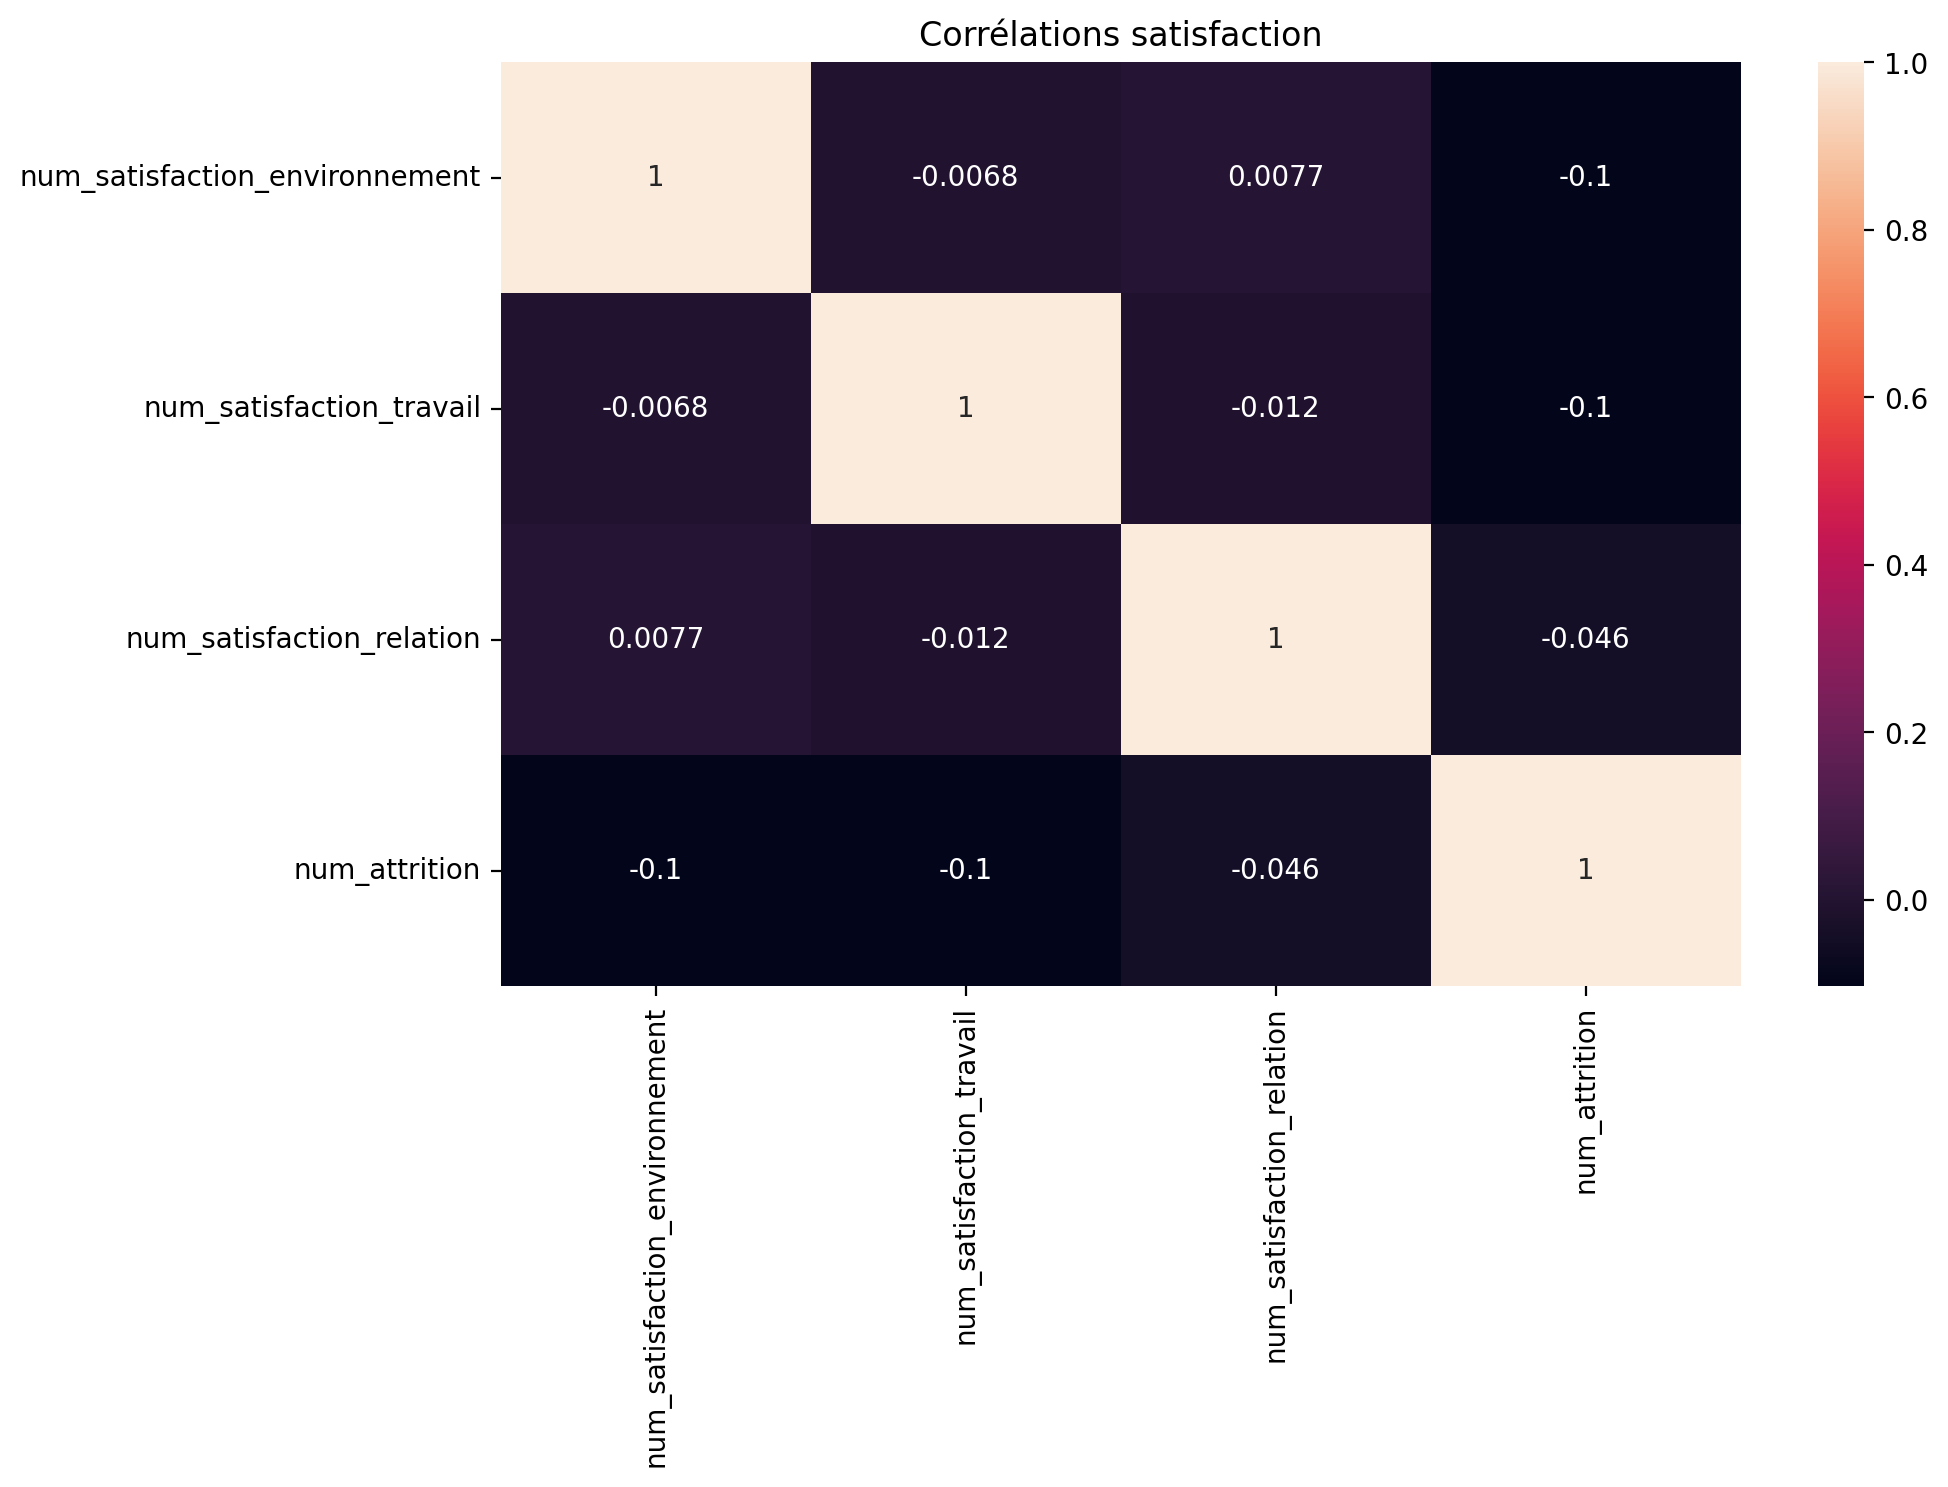

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(satisfaction_corr,annot=True)
plt.title("Corrélations satisfaction")
plt.show()

=> peu de correlation entre les différents niveaux des différentes satisfactions

# Heatmap - Attrition selon 9 critères

Identification en amont de 9 indicateurs pertinents pour étudier l'attrition et vérifier le niveau de corrélation

In [125]:
df1=df[["num_attrition","categorie_age","num_annees_avec_manager","heures_sup","annees_dans_entreprise","genre","categorie_salaire","situation","num_niveau_hierarchique","statut","num_annees_avec_manager"]]

In [122]:
df1

,num_attrition,categorie_age,num_annees_avec_manager,heures_sup,annees_dans_entreprise,genre,categorie_salaire,situation,num_niveau_hierarchique,statut,num_annees_avec_manager
0,1,35 - 44,5,Oui,6,Femme,5744 - 9860,Célibataire,2,2,5
1,0,45 - 54,7,Non,10,Homme,4230 - 5743,Marié(e),2,1,7
2,1,35 - 44,0,Oui,0,Homme,0 - 2696,Célibataire,1,1,0
3,0,25 - 34,0,Oui,8,Femme,2697 - 4229,Marié(e),1,1,0
4,0,25 - 34,2,Non,2,Homme,2697 - 4229,Marié(e),1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,0,35 - 44,3,Non,5,Homme,0 - 2696,Marié(e),2,1,3
1466,0,35 - 44,7,Non,7,Homme,9861 +,Marié(e),3,2,7
1467,0,25 - 34,3,Oui,6,Homme,5744 - 9860,Marié(e),2,2,3
1468,0,45 - 54,8,Non,9,Homme,4230 - 5743,Marié(e),2,2,8


In [126]:
#Transformation des colonnes catégoriques en numérique

#Focus sur la categorie_age
df1.loc[df1["categorie_age"]=="24 et moins","categorie_age"]=1
df1.loc[df1["categorie_age"]=="25 - 34","categorie_age"]=2
df1.loc[df1["categorie_age"]=="35 - 44","categorie_age"]=3
df1.loc[df1["categorie_age"]=="45 - 54","categorie_age"]=4
df1.loc[df1["categorie_age"]=="55 et plus","categorie_age"]=5

#Focus sur le genre
df1.loc[df1["genre"]=="Homme","genre"]=1
df1.loc[df1["genre"]=="Femme","genre"]=0

#Focus sur la categorie de salaire
df1.loc[df1["categorie_salaire"]=="0 - 2696","categorie_salaire"]=1
df1.loc[df1["categorie_salaire"]=="2697 - 4229","categorie_salaire"]=2
df1.loc[df1["categorie_salaire"]=="4230 - 5743","categorie_salaire"]=3
df1.loc[df1["categorie_salaire"]=="5744 - 9860","categorie_salaire"]=4
df1.loc[df1["categorie_salaire"]=="9861 +","categorie_salaire"]=5

#Focus sur la situation personelle
df1.loc[df1["situation"]=="Célibataire","situation"]=1
df1.loc[df1["situation"]=="Marié(e)","situation"]=2
df1.loc[df1["situation"]=="Divorcé(e)","situation"]=3

#Focus sur le heures sup
df1.loc[df1["heures_sup"]=="Oui","heures_sup"]=1
df1.loc[df1["heures_sup"]=="Non","heures_sup"]=0

In [127]:
corr_vf=df1.corr()

<Axes: >

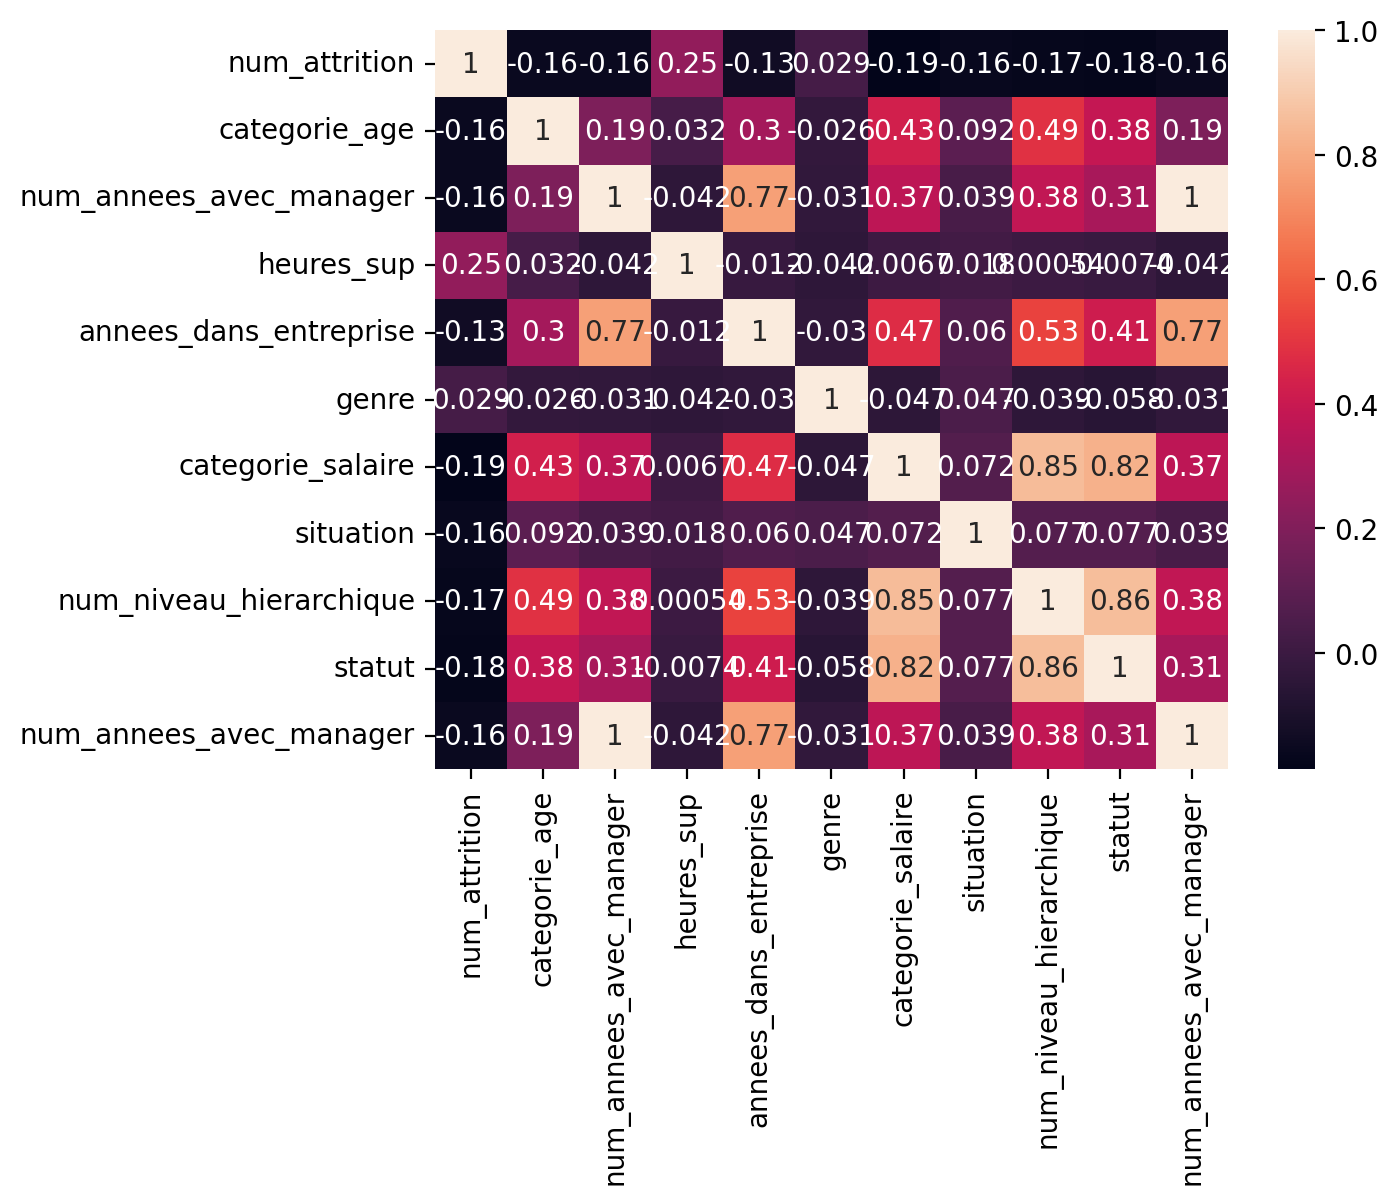

In [128]:
sns.heatmap(corr_vf,annot=True)

Les heures supp sont un facteur important d'attrition